Denzel Caesarian Iswanto Suhardjo (2440021376 - LB01 - COMP6745001: Machine Learning - Individual Assignment 7)

In [1]:
#Download data from https://drive.google.com/file/d/1HHMd6y3dYemN5YqNcesb6Up-TkU_fXIe/view?usp=sharing
import pandas as pd

purchasedData = pd.read_csv('/Volumes/Black/BINUS/BINUS_Semester 4/Machine Learning/Individual Assignment 7/data.csv')

In [2]:
#Create Dataframe
df = pd.DataFrame(purchasedData)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
#Extracting Independent and Dependent Variable(s)
x = df.iloc[:, :2].values
y = df.iloc[:, -1].values

In [4]:
#Normalize Data using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x[:10]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283]])

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
#K-NN Classification
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski").fit(x_train, y_train)
knnModel

KNeighborsClassifier()

In [7]:
#Predicting the Value
yPred = knnModel.predict(x_test)
yPred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [8]:
#Calculate Accuracy Score
from sklearn import metrics

print("Train Set Accuracy: ", metrics.accuracy_score(y_train, knnModel.predict(x_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, knnModel.predict(x_test)))

Train Set Accuracy:  0.91875
Test Set Accuracy:  0.95


In [9]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, knnModel.predict(x_test)))

Confusion Matrix:
 [[55  3]
 [ 1 21]]


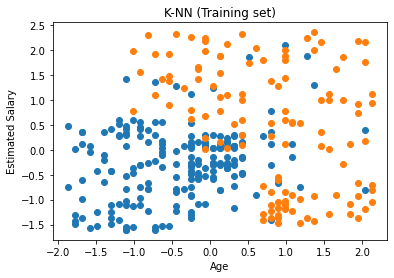

In [10]:
#Visualising the Training Set Result
import numpy as np
import matplotlib.pyplot as plt

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1])

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

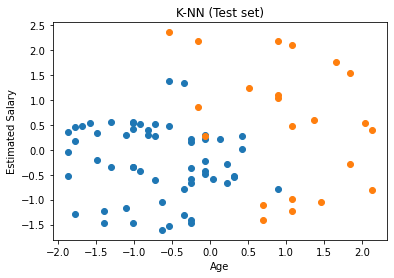

In [11]:
#Visualising the Test Set Result
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1])

plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()